# Libraries

In [1]:
import sys
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Versions

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

# K-means

# Circle

In [4]:
# from sklearn.metrics import davies_bouldin_score
# from sklearn.cluster import KMeans
# cost =[]
# for i in range(2, 11):
#     KM = KMeans(n_clusters = i, max_iter = 500)
#     KM.fit(X_twogaussians42)
#     cost.append(davies_bouldin_score(X_twogaussians42, KM.labels_))
#     print(davies_bouldin_score(X_twogaussians42, KM.labels_))
#     # calculates squared error
#     # for the clustered points
#     # cost.append(davies_bouldin_score(X_twogaussians42, KM.labels_))
#
# # plot the cost against K values
# plt.plot(range(2, 11), cost, color ='g', linewidth ='3')
# plt.xlabel("Value of K")
# plt.ylabel("Squared Error (Cost)")
# plt.show() # clear the plot


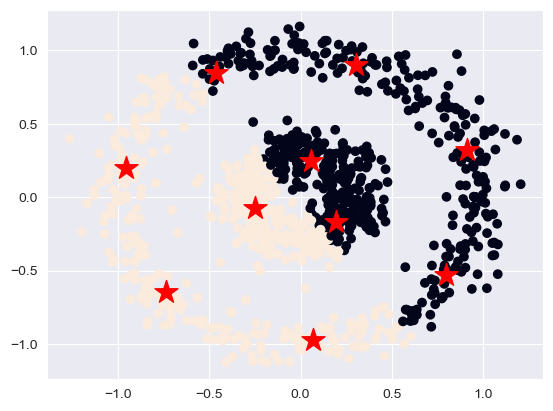

In [58]:
# kmeans = KMeans(n_clusters=10)
# kmeans.fit(X_circle)
sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels = sc_rbf.fit_predict(X_circle)
# centroids = sc_rbf.cluster_centers_
# labels = kmeans.labels_
plt.scatter(X_circle[:,0], X_circle[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='r')
plt.show()

In [6]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(X_circle, kmeans.labels_)

print("Davies-Bouldin index:", db_index)

Davies-Bouldin index: 34.56712919544143


In [7]:
kmeans_circle = KMeans(n_clusters=2)
clusters_circle = kmeans_circle.fit_predict(X_circle)
labels_circle = np.zeros_like(clusters_circle)
centroids = kmeans_circle.cluster_centers_

for i in range(10):
    cat = (clusters_circle == i)
    labels_circle[cat] = mode(y_circle[cat])[0]
acc = accuracy_score(y_circle, labels_circle)
print('Accuracy = ', acc)

Accuracy =  0.504


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\3389085741.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_circle[cat] = mode(y_circle[cat])[0]


Text(0, 0.5, 'X2')

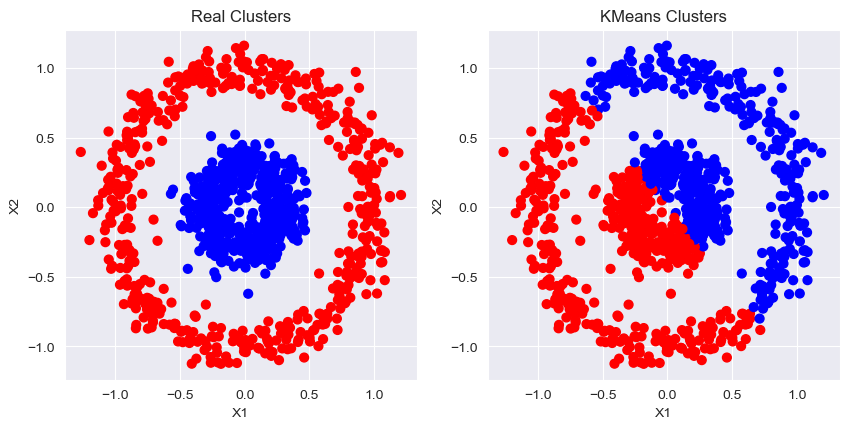

In [8]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

plt.subplot(2, 2, 1)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[y_circle], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[labels_circle], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

Accuracy using GMM =  0.5


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\877327061.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_circle[cat])[0]


Text(0, 0.5, 'X2')

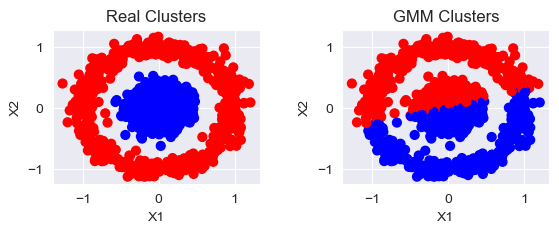

In [9]:
x_circle_col=circle_csv
x_circle_col = x_circle_col.drop('label', axis=1)
scaler_circle = preprocessing.StandardScaler()
scaler_circle.fit(X_circle)
scaled_X = scaler_circle.transform(X_circle)

xs = pd.DataFrame(scaled_X, columns = x_circle_col.columns)

from sklearn.mixture import GaussianMixture

gmm_circle = GaussianMixture(n_components=2)
gmm_y_circle = gmm_circle.fit_predict(xs)

labels = np.zeros_like(clusters_circle)

for i in range(2):
    cat = (gmm_y_circle == i)
    labels[cat] = mode(y_circle[cat])[0]

acc = accuracy_score(y_circle, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 1)
plt.scatter(circle_csv.x1, circle_csv.x2, c = colormap[y_circle], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(x_circle_col.x1, x_circle_col.x2, c = colormap[gmm_y_circle], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

C:\Users\eapit\anaconda3\lib\site-packages\seaborn\_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `X1` for parameter `x`

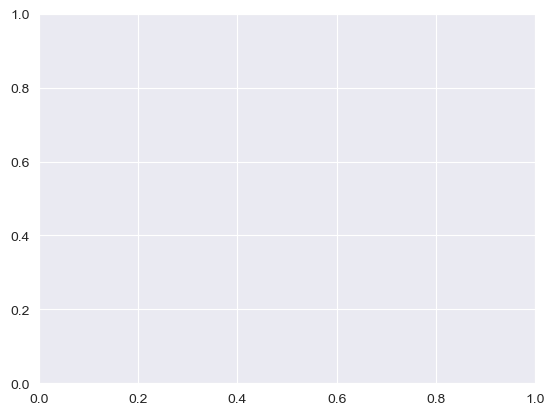

In [10]:
from sklearn.cluster import SpectralClustering
import seaborn as sns


data_df = X_circle

spec_cl = SpectralClustering(
    n_clusters=3,
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)


fig, ax = plt.subplots()
sns.scatterplot(x='X1', y='X2', data=data_df, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering - Scikit Learn');

In [11]:
scaler_circle = StandardScaler()
X_scaled_circle = scaler_circle.fit_transform(xs)

X_normalized_circle = normalize(X_scaled_circle)

X_normalized_circle = pd.DataFrame(X_normalized_circle)

pca = PCA(n_components = 2)
X_principal_circle = pca.fit_transform(X_normalized_circle)
X_principal_circle = pd.DataFrame(X_principal_circle)
X_principal_circle.columns = ['X1', 'X2']

X_principal_circle.head(2)

,X1,X2
0,0.918606,0.407874
1,0.761584,0.656716


In [12]:
spectral_model_rbf_circle = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf_circle = spectral_model_rbf_circle.fit_predict(X_principal_circle)

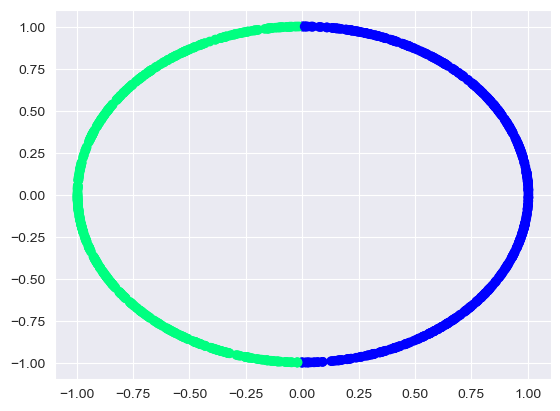

In [13]:
plt.scatter(X_principal_circle['X1'], X_principal_circle['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal_circle), cmap =plt.cm.winter)
plt.show()

In [14]:
spectral_model_nn_circle = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn_circle = spectral_model_nn_circle.fit_predict(X_principal_circle)

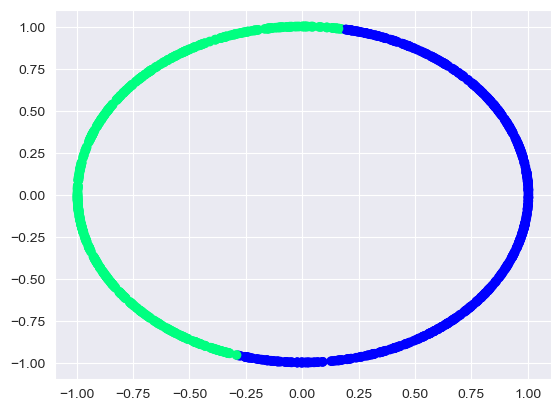

In [15]:
plt.scatter(X_principal_circle['X1'], X_principal_circle['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal_circle), cmap =plt.cm.winter)
plt.show()

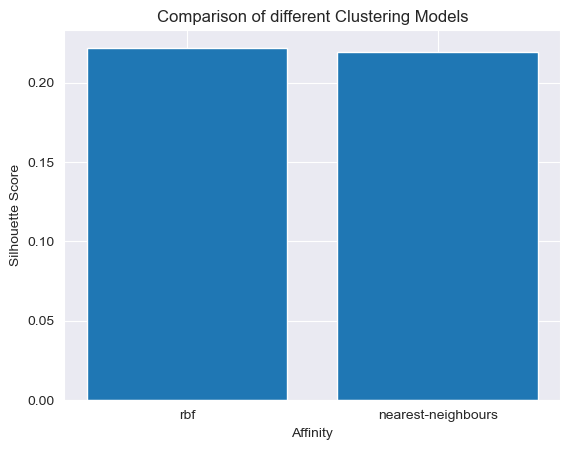

[0.2218675744613401, 0.21909710336380936]


In [16]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(circle_csv, labels_rbf_circle))
s_scores.append(silhouette_score(circle_csv, labels_nn_circle))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)

# Moons

In [17]:
kmeans_moons = KMeans(n_clusters=2)
clusters_moons = kmeans_moons.fit_predict(X_moons)
labels_moons = np.zeros_like(clusters_moons)
for i in range(2):
    cat = (clusters_moons == i)
    labels_moons[cat] = mode(y_moons[cat])[0]
acc = accuracy_score(y_moons, labels_moons)
print('Accuracy = ', acc)

Accuracy =  0.757


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\369210755.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_moons[cat] = mode(y_moons[cat])[0]


Text(0, 0.5, 'X2')

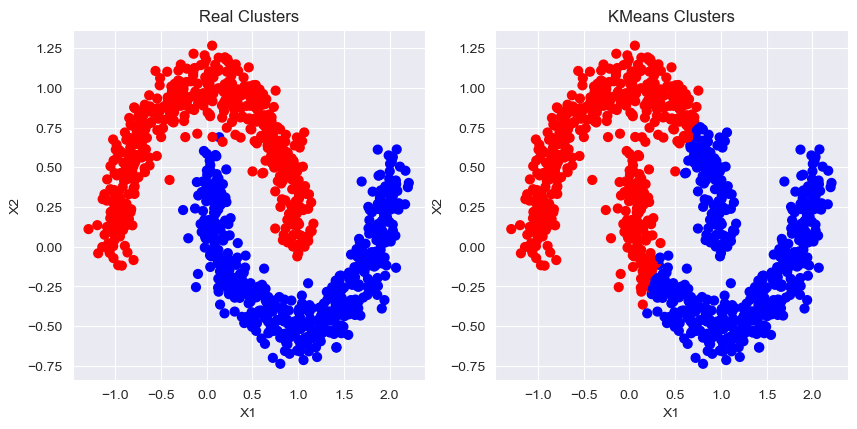

In [18]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

plt.subplot(2, 2, 1)
plt.scatter(moons_csv.x1, moons_csv.x2, c = colormap[y_moons], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(moons_csv.x1, moons_csv.x2, c = colormap[labels_moons], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\242617794.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_moons[cat])[0]


Accuracy using GMM =  0.857


Text(0, 0.5, 'X2')

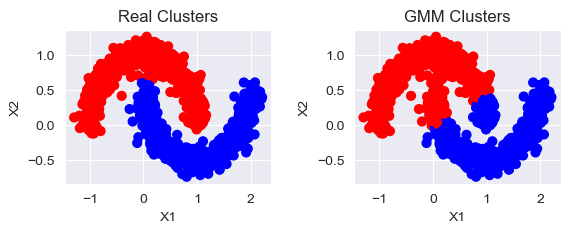

In [19]:
x_moons_col=moons_csv
x_moons_col = x_moons_col.drop('label', axis=1)
scaler_moons = preprocessing.StandardScaler()
scaler_moons.fit(X_moons)
scaled_X = scaler_moons.transform(X_moons)

xs = pd.DataFrame(scaled_X, columns = x_moons_col.columns)

from sklearn.mixture import GaussianMixture

gmm_moons = GaussianMixture(n_components=2)
gmm_y_moons = gmm_moons.fit_predict(xs)

labels = np.zeros_like(clusters_moons)

for i in range(2):
    cat = (gmm_y_moons == i)
    labels[cat] = mode(y_moons[cat])[0]

acc = accuracy_score(y_moons, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 1)
plt.scatter(moons_csv.x1, moons_csv.x2, c = colormap[y_moons], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(x_moons_col.x1, x_moons_col.x2, c = colormap[gmm_y_moons], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

In [20]:
scaler_moons = StandardScaler()
X_scaled_moons = scaler_moons.fit_transform(xs)

X_normalized_moons = normalize(X_scaled_moons)

X_normalized_moons = pd.DataFrame(X_normalized_moons)

pca = PCA(n_components = 2)
X_principal_moons = pca.fit_transform(X_normalized_moons)
X_principal_moons = pd.DataFrame(X_principal_moons)
X_principal_moons.columns = ['X1', 'X2']

X_principal_moons.head(2)

,X1,X2
0,-0.843041,0.536109
1,0.809806,0.591692


In [21]:
spectral_model_rbf_moons = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf_moons = spectral_model_rbf_moons.fit_predict(X_principal_moons)

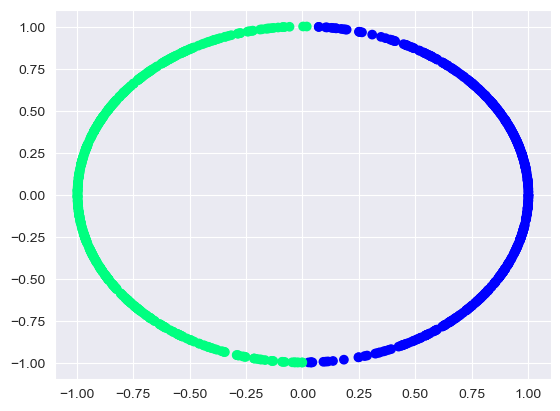

In [22]:
plt.scatter(X_principal_moons['X1'], X_principal_moons['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal_moons), cmap =plt.cm.winter)
plt.show()

In [23]:
spectral_model_nn_moons = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn_moons = spectral_model_nn_moons.fit_predict(X_principal_moons)

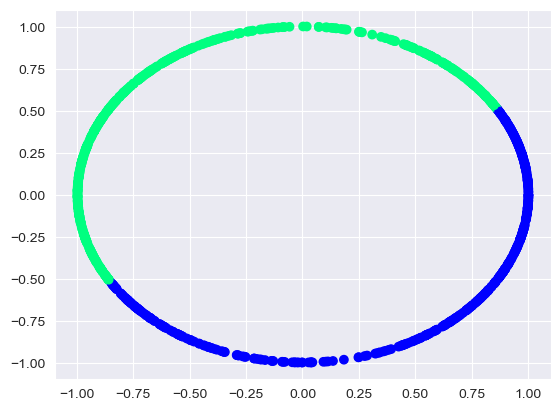

In [24]:
plt.scatter(X_principal_moons['X1'], X_principal_moons['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal_moons), cmap =plt.cm.winter)
plt.show()

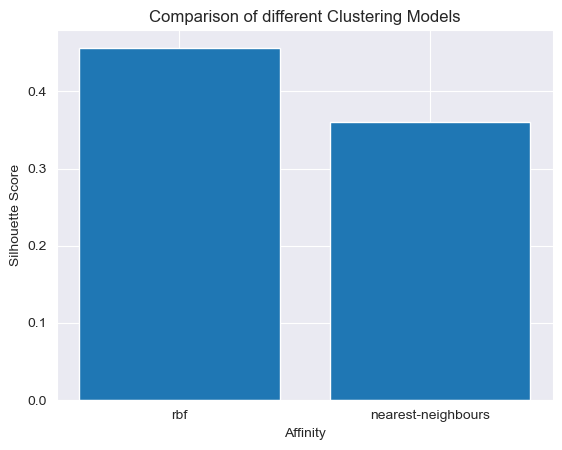

[0.45639206309744873, 0.3600662830063711]


In [25]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(moons_csv, labels_rbf_moons))
s_scores.append(silhouette_score(moons_csv, labels_nn_moons))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)

# Spiral

In [26]:
kmeans_spiral = KMeans(n_clusters=2)
clusters_spiral = kmeans_spiral.fit_predict(X_spiral)
labels_spiral = np.zeros_like(clusters_spiral)
for i in range(2):
    cat = (clusters_spiral == i)
    labels_spiral[cat] = mode(y_spiral[cat])[0]
acc = accuracy_score(y_spiral, labels_spiral)
print('Accuracy = ', acc)

Accuracy =  0.642


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\1947520020.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_spiral[cat] = mode(y_spiral[cat])[0]


Text(0, 0.5, 'Y')

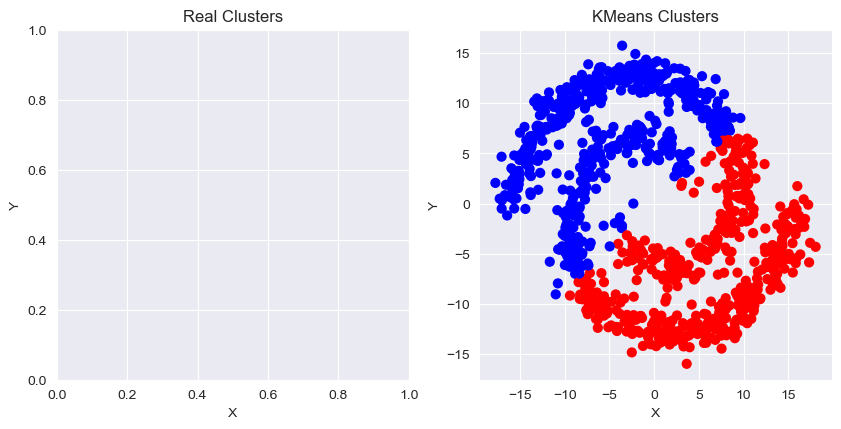

In [27]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

plt.subplot(2, 2, 1)
# plt.scatter(spiral_csv.x, spiral_csv.y, c = colormap[y_spiral], s=40)
plt.title('Real Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(2, 2, 2)
plt.scatter(spiral_csv.x, spiral_csv.y, c = colormap[labels_spiral], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')

Accuracy using GMM =  0.709


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\665804491.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_spiral[cat])[0]


Text(0, 0.5, 'Y')

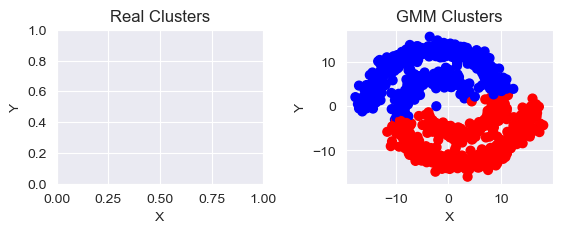

In [28]:
x_spiral_col=spiral_csv
x_spiral_col = x_spiral_col.drop('label', axis=1)
scaler_spiral = preprocessing.StandardScaler()
scaler_spiral.fit(X_spiral)
scaled_X = scaler_spiral.transform(X_spiral)

xs = pd.DataFrame(scaled_X, columns = x_spiral_col.columns)

from sklearn.mixture import GaussianMixture

gmm_spiral = GaussianMixture(n_components=2)
gmm_y_spiral = gmm_spiral.fit_predict(xs)

labels = np.zeros_like(clusters_spiral)

for i in range(2):
    cat = (gmm_y_spiral == i)
    labels[cat] = mode(y_spiral[cat])[0]

acc = accuracy_score(y_spiral, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 1)
# plt.scatter(spiral_csv.x, spiral_csv.y, c = colormap[y_spiral], s=40)
plt.title('Real Clusters')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(2, 2, 2)
plt.scatter(x_spiral_col.x, x_spiral_col.y, c = colormap[gmm_y_spiral], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X')
plt.ylabel('Y')

In [29]:
scaler_spiral = StandardScaler()
X_scaled_spiral = scaler_spiral.fit_transform(xs)

X_normalized_spiral = normalize(X_scaled_spiral)

X_normalized_spiral = pd.DataFrame(X_normalized_spiral)

pca = PCA(n_components = 2)
X_principal_spiral = pca.fit_transform(X_normalized_spiral)
X_principal_spiral = pd.DataFrame(X_principal_spiral)
X_principal_spiral.columns = ['X', 'Y']

X_principal_spiral.head(2)

,X,Y
0,0.915965,-0.401376
1,0.337831,-0.940686


In [30]:
spectral_model_rbf_spiral = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf_spiral = spectral_model_rbf_spiral.fit_predict(X_principal_spiral)

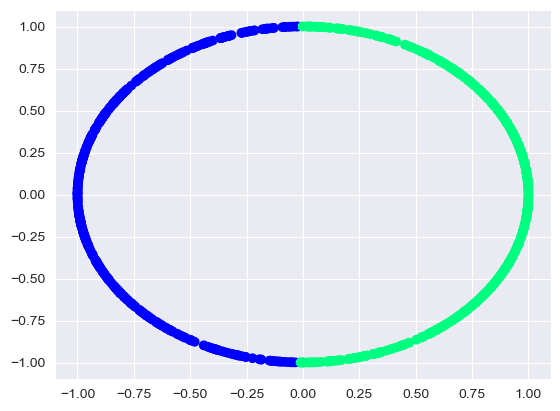

In [31]:
plt.scatter(X_principal_spiral['X'], X_principal_spiral['Y'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal_spiral), cmap =plt.cm.winter)
plt.show()

In [32]:
spectral_model_nn_spiral = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn_spiral = spectral_model_nn_spiral.fit_predict(X_principal_spiral)

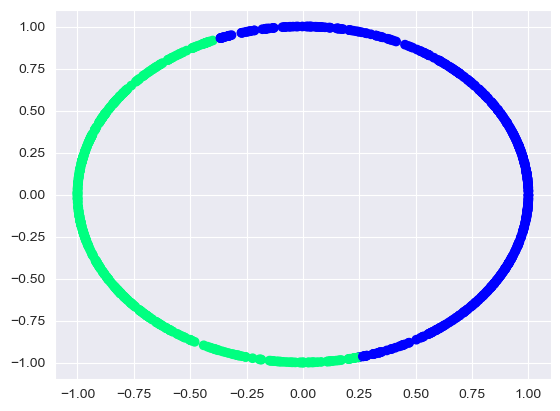

In [33]:
plt.scatter(X_principal_spiral['X'], X_principal_spiral['Y'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal_spiral), cmap =plt.cm.winter)
plt.show()

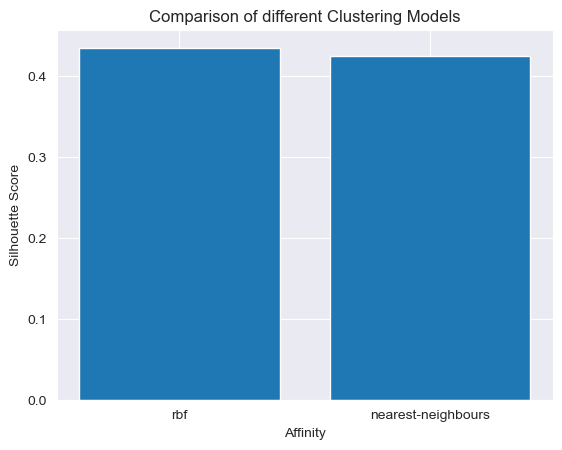

[0.4347661496346825, 0.42419729952495017]


In [34]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(spiral_csv, labels_rbf_spiral))
s_scores.append(silhouette_score(spiral_csv, labels_nn_spiral))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)

# Twogaussians42

In [35]:
kmeans_twogaussians42 = KMeans(n_clusters=2)
clusters_twogaussians42 = kmeans_twogaussians42.fit_predict(X_twogaussians42)
labels_twogaussians42 = np.zeros_like(clusters_twogaussians42)
for i in range(2):
    cat = (clusters_twogaussians42 == i)
    labels_twogaussians42[cat] = mode(y_twogaussians42[cat])[0]
acc = accuracy_score(y_twogaussians42, labels_twogaussians42)
print('Accuracy = ', acc)

Accuracy =  0.853


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\2333171436.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_twogaussians42[cat] = mode(y_twogaussians42[cat])[0]


Text(0, 0.5, 'X2')

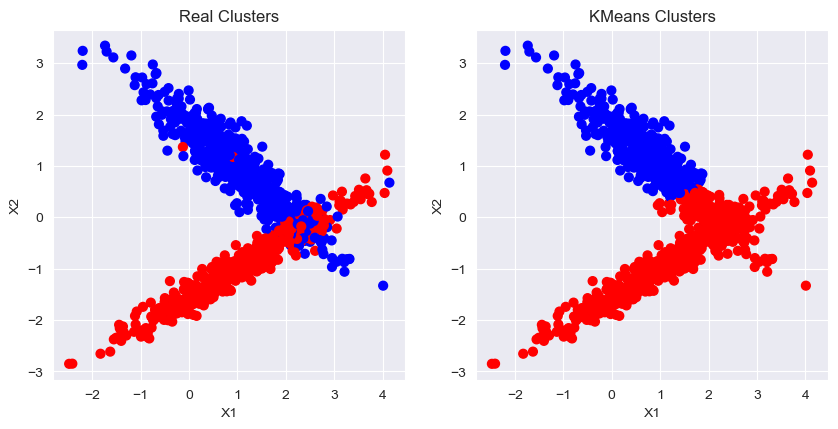

In [36]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

plt.subplot(2, 2, 1)
plt.scatter(twogaussians42_csv.x1, twogaussians42_csv.x2, c = colormap[y_twogaussians42], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(twogaussians42_csv.x1, twogaussians42_csv.x2, c = colormap[labels_twogaussians42], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

Accuracy using GMM =  0.948


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\1798286784.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_twogaussians42[cat])[0]


Text(0, 0.5, 'X2')

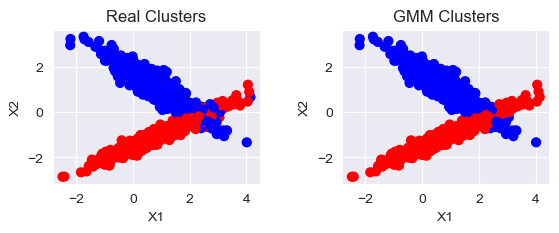

In [37]:
x_twogaussians42_col=twogaussians42_csv
x_twogaussians42_col = x_twogaussians42_col.drop('label', axis=1)
scaler_twogaussians42 = preprocessing.StandardScaler()
scaler_twogaussians42.fit(X_twogaussians42)
scaled_X = scaler_twogaussians42.transform(X_twogaussians42)

xs = pd.DataFrame(scaled_X, columns = x_twogaussians42_col.columns)

from sklearn.mixture import GaussianMixture

gmm_twogaussians42 = GaussianMixture(n_components=2)
gmm_y_twogaussians42 = gmm_twogaussians42.fit_predict(xs)

labels = np.zeros_like(clusters_twogaussians42)

for i in range(2):
    cat = (gmm_y_twogaussians42 == i)
    labels[cat] = mode(y_twogaussians42[cat])[0]

acc = accuracy_score(y_twogaussians42, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 1)
plt.scatter(twogaussians42_csv.x1, twogaussians42_csv.x2, c = colormap[y_twogaussians42], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(x_twogaussians42_col.x1, x_twogaussians42_col.x2, c = colormap[gmm_y_twogaussians42], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

In [38]:
scaler_twogaussians42 = StandardScaler()
X_scaled_twogaussians42 = scaler_twogaussians42.fit_transform(xs)

X_normalized_twogaussians42 = normalize(X_scaled_twogaussians42)

X_normalized_twogaussians42 = pd.DataFrame(X_normalized_twogaussians42)

pca = PCA(n_components = 2)
X_principal_twogaussians42 = pca.fit_transform(X_normalized_twogaussians42)
X_principal_twogaussians42 = pd.DataFrame(X_principal_twogaussians42)
X_principal_twogaussians42.columns = ['X1', 'X2']

X_principal_twogaussians42.head(2)

,X1,X2
0,-0.959396,0.397430
1,0.961463,0.414587


In [39]:
spectral_model_rbf_twogaussians42 = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf_twogaussians42 = spectral_model_rbf_twogaussians42.fit_predict(X_principal_twogaussians42)

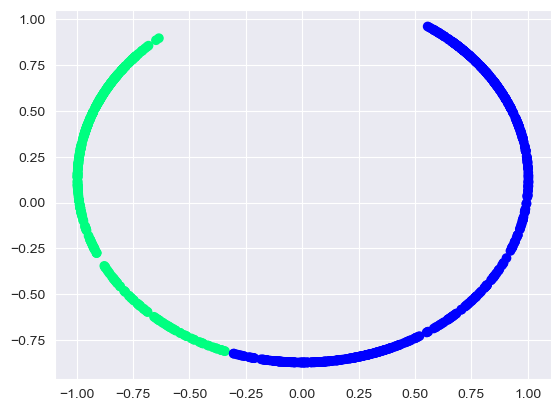

In [40]:
plt.scatter(X_principal_twogaussians42['X1'], X_principal_twogaussians42['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal_twogaussians42), cmap =plt.cm.winter)
plt.show()

In [41]:
spectral_model_nn_twogaussians42 = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn_twogaussians42 = spectral_model_nn_twogaussians42.fit_predict(X_principal_twogaussians42)

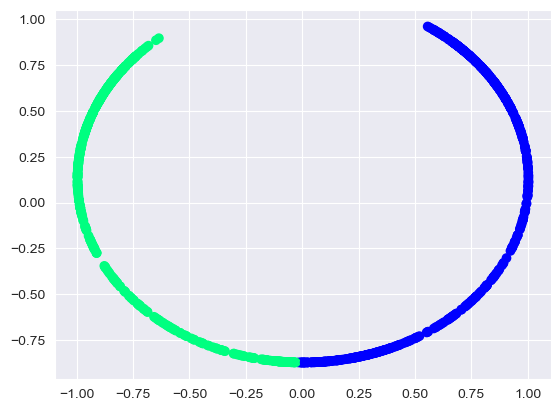

In [42]:
plt.scatter(X_principal_twogaussians42['X1'], X_principal_twogaussians42['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal_twogaussians42), cmap =plt.cm.winter)
plt.show()

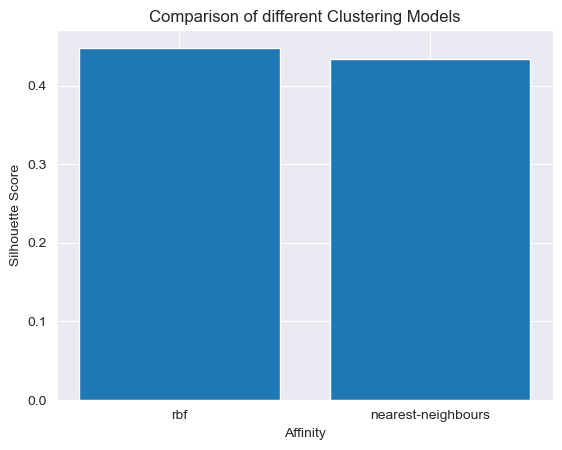

[0.44813016397662947, 0.4342032031252248]


In [43]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(twogaussians42_csv, labels_rbf_twogaussians42))
s_scores.append(silhouette_score(twogaussians42_csv, labels_nn_twogaussians42))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)

# Halfkernel

In [44]:
kmeans_halfkernel = KMeans(n_clusters=2)
clusters_halfkernel = kmeans_halfkernel.fit_predict(X_halfkernel)
labels_halfkernel = np.zeros_like(clusters_halfkernel)
for i in range(2):
    cat = (clusters_halfkernel == i)
    labels_halfkernel[cat] = mode(y_halfkernel[cat])[0]
acc = accuracy_score(y_halfkernel, labels_halfkernel)
print('Accuracy = ', acc)

Accuracy =  0.501


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\732065006.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_halfkernel[cat] = mode(y_halfkernel[cat])[0]


Text(0, 0.5, 'X2')

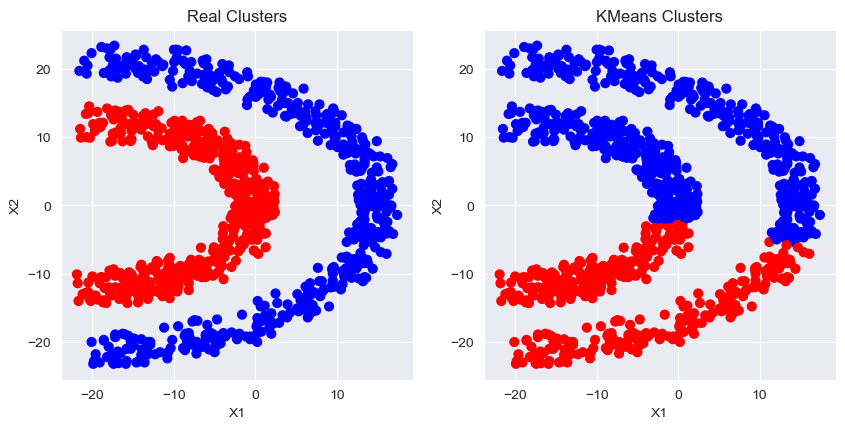

In [45]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'blue'])

plt.subplot(2, 2, 1)
plt.scatter(halfkernel_csv.x1, halfkernel_csv.x2, c = colormap[y_halfkernel], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(halfkernel_csv.x1, halfkernel_csv.x2, c = colormap[labels_halfkernel], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

Accuracy using GMM =  0.52


C:\Users\eapit\AppData\Local\Temp\ipykernel_21748\1828202267.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[cat] = mode(y_halfkernel[cat])[0]


Text(0, 0.5, 'X2')

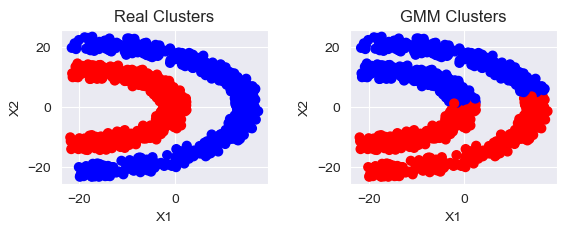

In [46]:
x_halfkernel_col=halfkernel_csv
x_halfkernel_col = x_halfkernel_col.drop('label', axis=1)
scaler_halfkernel = preprocessing.StandardScaler()
scaler_halfkernel.fit(X_halfkernel)
scaled_X = scaler_halfkernel.transform(X_halfkernel)

xs = pd.DataFrame(scaled_X, columns = x_halfkernel_col.columns)

from sklearn.mixture import GaussianMixture

gmm_halfkernel = GaussianMixture(n_components=2)
gmm_y_halfkernel = gmm_halfkernel.fit_predict(xs)

labels = np.zeros_like(clusters_halfkernel)

for i in range(2):
    cat = (gmm_y_halfkernel == i)
    labels[cat] = mode(y_halfkernel[cat])[0]

acc = accuracy_score(y_halfkernel, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 1)
plt.scatter(halfkernel_csv.x1, halfkernel_csv.x2, c = colormap[y_halfkernel], s=40)
plt.title('Real Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 2)
plt.scatter(x_halfkernel_col.x1, x_halfkernel_col.x2, c = colormap[gmm_y_halfkernel], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('X1')
plt.ylabel('X2')

In [47]:
scaler_halfkernel = StandardScaler()
X_scaled_halfkernel = scaler_halfkernel.fit_transform(xs)

X_normalized_halfkernel = normalize(X_scaled_halfkernel)

X_normalized_halfkernel = pd.DataFrame(X_normalized_halfkernel)

pca = PCA(n_components = 2)
X_principal_halfkernel = pca.fit_transform(X_normalized_halfkernel)
X_principal_halfkernel = pd.DataFrame(X_principal_halfkernel)
X_principal_halfkernel.columns = ['X1', 'X2']

X_principal_halfkernel.head(2)

,X1,X2
0,1.016524,0.010288
1,-0.811407,0.615351


In [48]:
spectral_model_rbf_halfkernel = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf_halfkernel = spectral_model_rbf_halfkernel.fit_predict(X_principal_halfkernel)

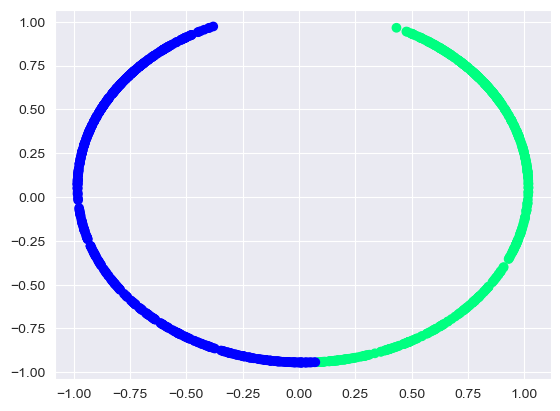

In [49]:
plt.scatter(X_principal_halfkernel['X1'], X_principal_halfkernel['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal_halfkernel), cmap =plt.cm.winter)
plt.show()

In [50]:
spectral_model_nn_halfkernel = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn_halfkernel = spectral_model_nn_halfkernel.fit_predict(X_principal_halfkernel)

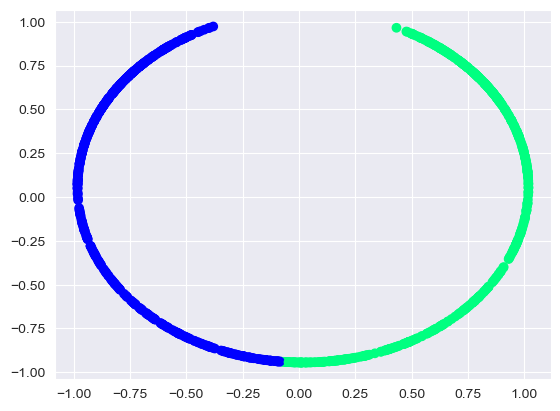

In [51]:
plt.scatter(X_principal_halfkernel['X1'], X_principal_halfkernel['X2'],
            c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal_halfkernel), cmap =plt.cm.winter)
plt.show()

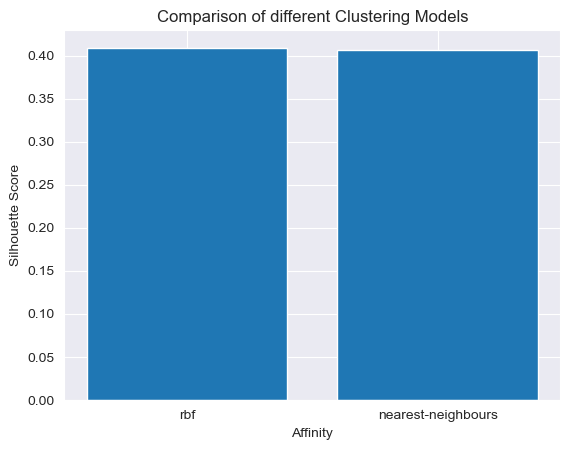

[0.40920797090210814, 0.40664286570492664]


In [52]:
affinity = ['rbf', 'nearest-neighbours']
s_scores = []
s_scores.append(silhouette_score(halfkernel_csv, labels_rbf_halfkernel))
s_scores.append(silhouette_score(halfkernel_csv, labels_nn_halfkernel))
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()
print(s_scores)